In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("final_dataset - final_dataset.csv")
data

,Year,Wheat_Production,Wheat_Ethanol production from commodity,Wheat_Biodiesel production from commodity,Wheat_Imports,Wheat_Consumption,Wheat_Ending stocks,Wheat_Exports,Wheat_Area harvested,Wheat_Feed,...,ROOTS AND TUBERS_Producer price,ROOTS AND TUBERS_Human consumption per capita,ROOTS AND TUBERS_Direct GHG emission,ROOTS AND TUBERS_Total Calorie availability,ROOTS AND TUBERS_Food Protein availability,ROOTS AND TUBERS_Food Fat availability,Agricultural sector_Direct GHG emission,Total Calorie availability,Food Protein availability,Food Fat availability
0,1990,74296.96,0,0,990.66,37149.84,23626.21,29110.23,27964.00,13129.00,...,0.00,11.76,0.74,0.00,0.00,0.00,356.22,0.00,0.00,0.00
1,1991,53890.40,0,0,1107.69,30797.63,12927.60,34899.08,23391.00,6654.31,...,109.00,12.46,0.74,0.00,0.00,0.00,357.55,0.00,0.00,0.00
2,1992,67136.43,0,0,1905.12,30686.04,14443.53,36839.58,25414.30,5269.02,...,122.00,12.20,0.77,96.67,2.57,0.17,364.98,3555.27,110.40,143.38
3,1993,65220.42,0,0,2961.10,33736.95,15472.30,33415.80,25373.90,7394.59,...,136.00,12.55,0.80,98.67,2.63,0.17,366.15,3589.20,111.10,144.53
4,1994,63168.34,0,0,2501.15,35013.38,13787.63,32340.77,25009.66,9373.19,...,123.00,13.05,0.86,100.00,2.67,0.17,376.08,3634.03,112.19,145.76
5,1995,59401.64,0,0,1847.97,31026.24,10233.22,33777.78,24645.44,4164.05,...,149.00,12.64,0.86,100.67,2.70,0.17,374.66,3639.90,112.66,145.05
6,1996,61981.72,0,0,2512.04,35397.13,12073.02,27256.82,25414.34,8382.53,...,108.00,13.36,0.89,103.00,2.75,0.18,378.77,3633.90,113.08,143.03
7,1997,67536.50,0,0,2582.80,34213.23,19663.56,28315.53,25414.34,6817.61,...,124.00,13.12,0.85,103.33,2.76,0.18,377.46,3633.90,113.05,141.75
8,1998,69324.60,0,0,2803.25,37588.02,25743.61,28459.77,23876.53,10630.57,...,123.00,13.29,0.84,105.33,2.82,0.18,375.64,3659.33,113.43,142.53
9,1999,62460.72,0,0,2571.91,35359.03,25847.04,29570.18,21772.16,7601.43,...,127.00,13.07,0.86,104.33,2.80,0.18,373.12,3693.10,114.67,146.01


In [3]:
y_numerical= data["Beef and veal_Human consumption per capita"]
X_numerical_only = data.drop(["Beef and veal_Human consumption per capita"], axis=1)

## Linear Regression

In [4]:
# define model
model = LinearRegression()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = {'fit_intercept':[True,False], 'normalize':[True,False]}

# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv, refit=True)

# execute search
result = search.fit(X_numerical_only, y_numerical)

#get the best model
estimator = search.best_estimator_
print('Best Estimator: %s' % estimator)

# summarize result
print('Best RMSE Score: %s' % (-1 * result.best_score_))
lr_rmse = -1 * result.best_score_
print('Best Hyperparameters: %s' % result.best_params_)

Best Estimator: LinearRegression(normalize=True)
Best RMSE Score: 0.4530652902210355
Best Hyperparameters: {'fit_intercept': True, 'normalize': True}


C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [25]:
import numpy as np

In [46]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    #stds_test = results['std_test_score']
    #means_train = results['mean_train_score']
    #stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index]) * -1
        #e_1 = np.array(stds_test[best_index])
        #y_2 = np.array(means_train[best_index])
        #e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

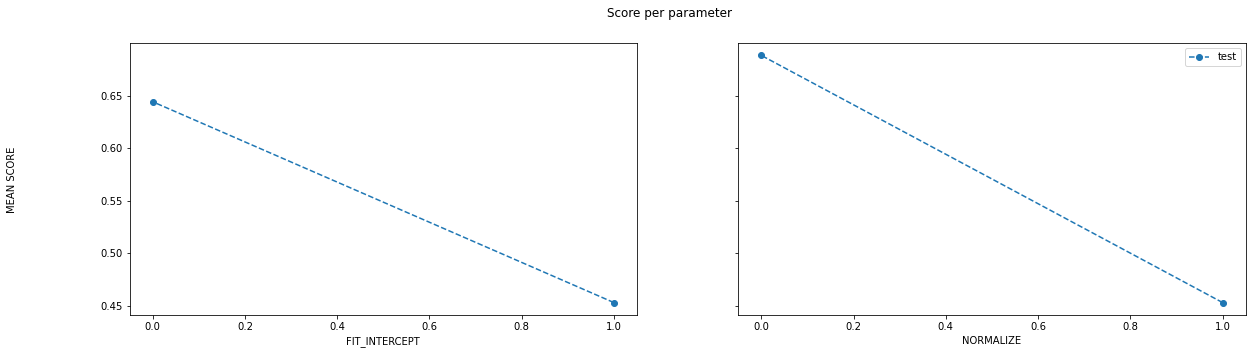

In [47]:
plot_search_results(search)

In [22]:
search.cv_results_

{'mean_fit_time': array([0.03057506, 0.01149436, 0.01170925, 0.00906996]),
 'std_fit_time': array([0.02819062, 0.00272596, 0.00303244, 0.00163692]),
 'mean_score_time': array([0.00715026, 0.00759207, 0.00670958, 0.00668449]),
 'std_score_time': array([0.00188148, 0.00204018, 0.00068516, 0.00142761]),
 'param_fit_intercept': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_normalize': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True, 'normalize': True},
  {'fit_intercept': True, 'normalize': False},
  {'fit_intercept': False, 'normalize': True},
  {'fit_intercept': False, 'normalize': False}],
 'split0_test_score': array([-0.61787328, -1.14341114, -0.88874702, -0.88874702]),
 'split1_test_score': array([-0.47066868, -0.76082238, -0.8258984 , -0.8258984

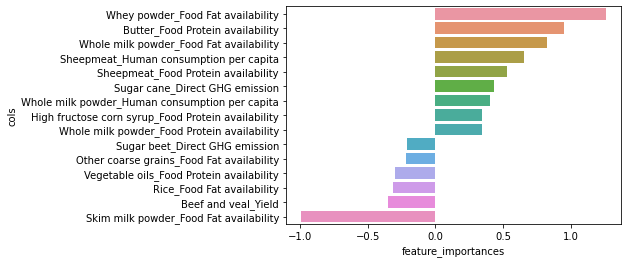

In [57]:
feature_importance_df = pd.DataFrame({"cols":X_numerical_only.columns, "feature_importances":estimator.coef_})
feature_importance_df['abs'] = feature_importance_df['feature_importances'].abs()
feature_importance_df = feature_importance_df.nlargest(15,'abs',keep='first')
sns.barplot(x = 'feature_importances',
            y = 'cols',
            data = feature_importance_df.sort_values('feature_importances', ascending=False),
            orient = 'h')

plt.show()

In [46]:
feature_importance_df

,cols,feature_importances,abs
0,Year,-0.001651,0.001651
1,Wheat_Production,-0.000010,0.000010
2,Wheat_Ethanol production from commodity,0.005770,0.005770
3,Wheat_Biodiesel production from commodity,-0.004207,0.004207
4,Wheat_Imports,-0.000035,0.000035
...,...,...,...
631,ROOTS AND TUBERS_Food Fat availability,0.115620,0.115620
632,Agricultural sector_Direct GHG emission,-0.000007,0.000007
633,Total Calorie availability,-0.000008,0.000008
634,Food Protein availability,0.000216,0.000216


## KNeighborsRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
# define model
model = KNeighborsRegressor()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = {'n_neighbors': [2,3,4,5,6,7,8,9,10], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1,2]}

# define search
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, refit=True)

# execute search
result = search.fit(X_numerical_only, y_numerical)

#get the best model
estimator = search.best_estimator_
print('Best Estimator: %s' % estimator)

# summarize result
print('Best RMSE Score: %s' % (-1 * result.best_score_))
knn_rmse = -1 * result.best_score_
print('Best Hyperparameters: %s' % result.best_params_)

Best Estimator: KNeighborsRegressor(n_neighbors=3, p=1)
Best RMSE Score: 0.3393333333333332
Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}


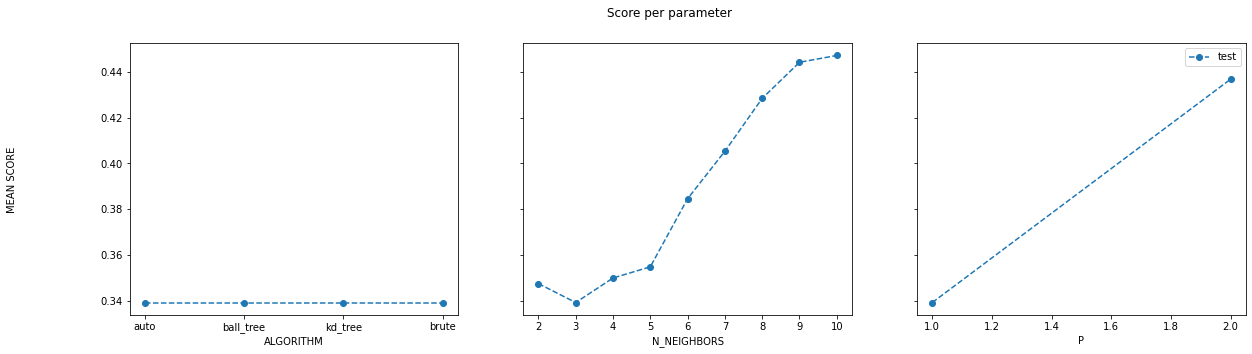

In [51]:
plot_search_results(search)

## MLPRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [10]:
from sklearn.neural_network import MLPRegressor

In [52]:
# define model
model = MLPRegressor()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = {"hidden_layer_sizes": [1,4,8,20,40,80,100], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005,0.0001]}

# define search
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, refit=True)

# execute search
result = search.fit(X_numerical_only, y_numerical)

#get the best model
estimator = search.best_estimator_
print('Best Estimator: %s' % estimator)

# summarize result
print('Best RMSE Score: %s' % (-1 * result.best_score_))
mlp_rmse = -1 * result.best_score_
print('Best Hyperparameters: %s' % result.best_params_)

Best Estimator: MLPRegressor(activation='tanh', alpha=0.0005, hidden_layer_sizes=40,
             solver='lbfgs')
Best RMSE Score: 0.6039159365762994
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0005, 'hidden_layer_sizes': 40, 'solver': 'lbfgs'}


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-1.49750570e+02             nan -2.83405819e+03 -2.54380182e+02
             nan -4.47132515e+03 -2.76016648e+02             nan
 -5.15783809e+03 -2.80338561e+02             nan -3.89061548e+03
 -2.71781456e+02             nan -3.32485474e+03 -2.35609147e+02
             nan -4.37236506e+03 -2.60597966e+02             nan
 -4.11254787e+03 -1.13510501e+02             nan -3.59678379e+03
 -2.44912052e+02             nan -3.71618720e+03 -2.96262988e+02
             nan -5.09327267e+03 -2.78737995e+02             nan
 -4.17482102e+03 -2.91499911e+02             nan -2.61641253e+03
 -2.75905877e+02             nan -3.16847641e+03 -2.89273870e+02
             nan -4.47023414e+03 -1.42939426e+02             nan
 -3.86093627e+03 -2.25646978e+02             nan -4.20027081e+03
 -2.87986131e+02             nan -4.57355804e+03 -3.16795380e+02
             nan -2.50540

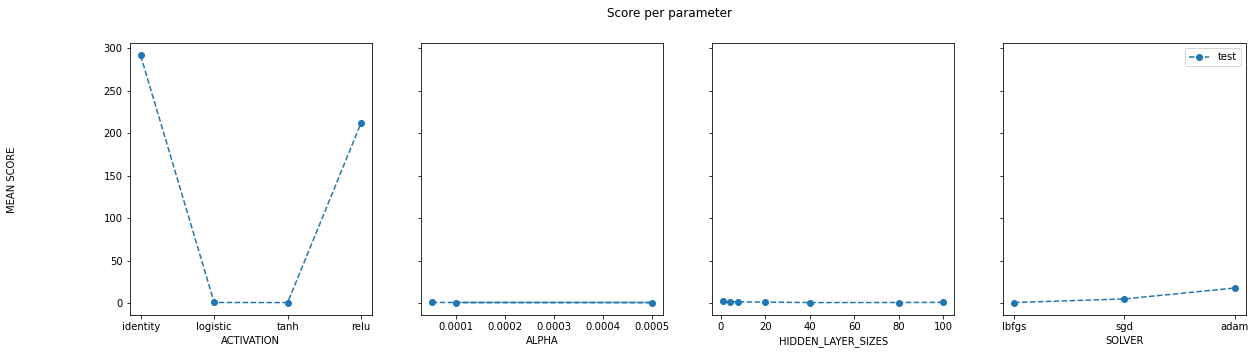

In [53]:
plot_search_results(search)

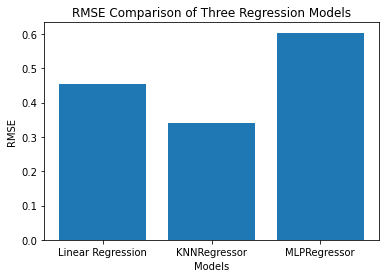

In [54]:
import matplotlib.pyplot as plt

# Create bar chart of RMSE values
rmse_values = [lr_rmse, knn_rmse, mlp_rmse]
labels = ['Linear Regression', 'KNNRegressor', 'MLPRegressor']

plt.bar(labels, rmse_values)
plt.title('RMSE Comparison of Three Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()